## Pulling in Raw data into Dataframes

In [1]:
# Create import files
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Set the CSV to use as Path Class
closing_prices_path = Path("Closing prices.csv")
ESG_path = Path("barrons_ESG_everyone.csv")
financial_path = Path("FinancialAnalysis_withtickers.csv")
barron_path = Path("barrons_tickers_Morningstars.csv")

In [3]:
# Import CSV into Dataframe

closing_prices = pd.read_csv(closing_prices_path, index_col="Dates", parse_dates=True, infer_datetime_format=True)
ESG_data = pd.read_csv(ESG_path, index_col="Ticker", parse_dates=True, infer_datetime_format=True)
barron_data= pd.read_csv(barron_path, index_col="Ticker", parse_dates=True, infer_datetime_format=True)
financial_data = pd.read_csv(financial_path, parse_dates=True, infer_datetime_format=True)
financial_data = financial_data.rename(columns={"Tickers": "Ticker"})
financial_clean = financial_data.set_index('Ticker').dropna()

## Check Dataframes 

In [4]:
# Checking Dataframes

# closing_prices.head()
# ESG_data.head()
# barron_data.head()
# financial_data.head()

## Drop Null Values

In [5]:
# Drop Appropiate columns
# Drop Null Values
closing_fixed = closing_prices.dropna(axis = 'columns')
ESG_fixed = ESG_data.dropna()

# financial_data.isnull().sum()

del financial_clean['Weight (%)']

## Rename Columns

In [6]:
# Rename the columns


closing_fixed.columns = closing_fixed.columns.str.replace(r'us equity', '')

barron_data.columns = ['Name','10 year return', 'Dividend Yield TTM', 'Morningstar Risk', 'Turnover Ratio', 'SEC Dividend Yield', 'Morningstar Rating','Fund Category', 'Standard Deviation 3 year']



In [7]:
barron_data.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,SEC Dividend Yield,Morningstar Rating,Fund Category,Standard Deviation 3 year
Ticker,,,,,,,,,
AMFEX,AAMA Equity,NaN,0.87,NaN,20.0,NaN,NaN,Large Blend,NaN
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,2.18,4.0,Large Value,16.13
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.20,3.0,Large Value,19.02
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,NaN,5.0,Large Growth,14.20
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,0.40,4.0,Large Growth,15.04


In [8]:
barron_data = barron_data.dropna(subset=['10 year return'])

In [9]:
barron_data.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,SEC Dividend Yield,Morningstar Rating,Fund Category,Standard Deviation 3 year
Ticker,,,,,,,,,
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,2.18,4.0,Large Value,16.13
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.20,3.0,Large Value,19.02
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,NaN,5.0,Large Growth,14.20
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,0.40,4.0,Large Growth,15.04
BRLVX,American Beacon Bridgeway Lg Cp Val R5,8.51,2.47,Above Average,44.0,NaN,3.0,Large Value,21.02


In [10]:
del barron_data['SEC Dividend Yield']
del barron_data['Standard Deviation 3 year']

In [11]:
barron_data.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category
Ticker,,,,,,,
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,4.0,Large Value
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.0,Large Value
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,5.0,Large Growth
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,4.0,Large Growth
BRLVX,American Beacon Bridgeway Lg Cp Val R5,8.51,2.47,Above Average,44.0,3.0,Large Value


In [12]:
barron_clean = barron_data.drop(['barrons_tickers'])

In [13]:
barron_clean.isnull().sum()

Name                  0
10 year return        0
Dividend Yield TTM    0
Morningstar Risk      0
Turnover Ratio        0
Morningstar Rating    0
Fund Category         0
dtype: int64

## Correctly Formatted Dataframes for Team


In [14]:
ESG_fixed.head()

,Name,E,S,G,Average (Current)
Ticker,,,,,
AUIAX,AB Equity Income A,4.80,11.02,8.35,24.38
FDSAX,AIG Focused Dividend Strategy A,5.59,10.89,7.62,24.10
AKRIX,Akre Focus Instl,2.77,9.97,8.04,20.91
AMAGX,Amana Growth Investor,3.26,9.60,6.95,21.04
BRLVX,American Beacon Bridgeway Lg Cp Val R5,5.68,10.78,8.08,24.53


In [15]:
closing_fixed.head()

,MXXVX,VLCGX,MIGFX,UMLGX,MGK,VIGRX,CSIEX,WLGAX,POGAX,BIAFX,...,SSHFX,HRCVX,FBCVX,NNGRX,TORYX,FDSAX,YAFFX,YACKX,SPX index,GSIN index
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,11.83,10.04,13.43,10.14,41.8700,27.32,30.53,11.40,14.02,7.84,...,28.58,12.06,9.96,17.13,26.76,9.98,16.13,15.22,1115.10,72.81
2010-01-04,12.01,10.22,13.59,10.23,42.4699,27.76,30.97,11.58,14.26,7.93,...,29.10,12.22,10.20,17.45,27.08,10.12,16.33,15.41,1132.98,74.05
2010-01-05,12.07,10.24,13.57,10.27,42.5700,27.84,31.09,11.61,14.30,7.97,...,29.20,12.23,10.29,17.52,27.07,10.14,16.33,15.41,1136.52,74.24
2010-01-06,12.04,10.25,13.55,10.28,42.5200,27.84,31.12,11.58,14.31,7.98,...,29.32,12.27,10.33,17.58,27.11,10.13,16.31,15.40,1137.14,74.19
2010-01-07,12.10,10.23,13.57,10.28,42.5800,27.89,31.18,11.62,14.38,8.02,...,29.50,12.30,10.43,17.68,27.30,10.15,16.32,15.42,1141.70,74.08


In [16]:
barron_clean.head()

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category
Ticker,,,,,,,
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,4.0,Large Value
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.0,Large Value
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,5.0,Large Growth
AMAGX,Amana Growth Investor,12.47,0.37,Low,0.0,4.0,Large Growth
BRLVX,American Beacon Bridgeway Lg Cp Val R5,8.51,2.47,Above Average,44.0,3.0,Large Value


In [17]:
financial_clean.head()

,Name,P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,
AMFEX,AAMA Equity,16.21,2.81,9.91,28.25,9.79,0.87,"114,361.73"
AUIAX,AB Equity Income A,13.37,1.97,8.47,28.10,8.01,2.91,"95,224.17"
FDSAX,AIG Focused Dividend,10.79,2.23,5.90,23.64,7.17,3.95,"50,471.18"
AKRIX,Akre Focus Instl,29.46,6.75,10.37,40.51,12.77,0.00,"62,286.32"
AMAGX,Amana Growth Investo,23.53,7.27,14.04,40.37,10.65,0.37,"83,714.94"


## Concat ESG and Financial Metrics and Barron

In [18]:
esg_fm_barron = pd.concat([barron_clean.drop(columns = "10 year return", inplace = False),ESG_fixed.drop(columns = 'Name',inplace = False), financial_clean.drop(columns = 'Name',inplace = False)], axis = 'columns', join = 'inner')
esg_fm_barron_df = esg_fm_barron.drop(['CMLIX', 'JNGIX', 'SPY'])

## Performance anaylsis

In [19]:
esg_fm_barron_df.head()

,Name,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category,E,S,G,Average (Current),P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,,,,,,,,,,
AUIAX,AB Equity Income A,2.91,Below Average,43.0,4.0,Large Value,4.80,11.02,8.35,24.38,13.37,1.97,8.47,28.10,8.01,2.91,"95,224.17"
FDSAX,AIG Focused Dividend Strategy A,3.95,Average,37.0,3.0,Large Value,5.59,10.89,7.62,24.10,10.79,2.23,5.90,23.64,7.17,3.95,"50,471.18"
AKRIX,Akre Focus Instl,0.00,Low,3.0,5.0,Large Growth,2.77,9.97,8.04,20.91,29.46,6.75,10.37,40.51,12.77,0.00,"62,286.32"
AMAGX,Amana Growth Investor,0.37,Low,0.0,4.0,Large Growth,3.26,9.60,6.95,21.04,23.53,7.27,14.04,40.37,10.65,0.37,"83,714.94"
BRLVX,American Beacon Bridgeway Lg Cp Val R5,2.47,Above Average,44.0,3.0,Large Value,5.68,10.78,8.08,24.53,12.79,1.86,5.64,16.84,8.09,2.47,"36,213.84"


In [20]:
closing_fixed.iloc[-1]

 MXXVX          32.04
 VLCGX          18.87
 MIGFX          32.95
 UMLGX          13.00
 MGK           145.66
               ...   
 FDSAX          17.36
 YAFFX          18.25
 YACKX          20.48
SPX index     3230.78
GSIN index     144.01
Name: 2020-01-01 00:00:00, Length: 133, dtype: float64

**Calculating Total Returns**

In [21]:
closing_fixed_total_returns = (closing_fixed.iloc[-1] / closing_fixed.iloc[0]) - 1
closing_fixed_total_returns.sort_values(ascending=False).head(10)

 AKRIX     3.480354
 EGFIX     2.836653
 PWB       2.572099
 MGK       2.478863
 VIGRX     2.435944
 PKW       2.332915
 VFTNX     2.288288
 SPHQ      2.259358
 BIAFX     2.177296
 VHIAX     2.027778
dtype: float64

**Calculating Annualized Returns**

In [22]:
closing_fixed_annualized_returns = ((1+closing_fixed_total_returns)**(1/10))-1
closing_fixed_annualized_returns.sort_values(ascending=False).head(20)

 AKRIX       0.161800
 EGFIX       0.143919
 PWB         0.135775
 MGK         0.132775
 VIGRX       0.131370
 PKW         0.127931
 VFTNX       0.126411
 SPHQ        0.125416
 BIAFX       0.122550
 VHIAX       0.117152
 FTCS        0.113928
 MEGBX       0.113537
SPX index    0.112242
 GTLLX       0.111903
 AFDAX       0.111357
 JPGSX       0.109881
 DSI         0.108951
 POGAX       0.107923
 GCEQX       0.107792
 SUSA        0.105853
dtype: float64

In [23]:
type(closing_fixed_annualized_returns)

pandas.core.series.Series

**Converting Series to DataFrame**

In [24]:
results = pd.DataFrame( data = closing_fixed_annualized_returns)
results.to_csv('portfolio.csv')
returns_path = Path("portfolio.csv")
returns_df = pd.read_csv(returns_path, parse_dates=True, infer_datetime_format=True)
returns_data = returns_df.rename(columns={"Unnamed: 0": "Ticker", "0": "Returns"})
returns_data['Ticker'] = returns_data['Ticker'].str.strip()

In [25]:
returns_data_1 = returns_data.set_index('Ticker').dropna()
final_returns = returns_data_1.drop(['SPX index', 'GSIN index', 'CSLBX', 'MASPX', 'TWGTX'])

In [26]:
combined = pd.concat([final_returns, esg_fm_barron_df], axis = 'columns', join = 'inner')
combined.head()

,Returns,Name,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category,E,S,G,Average (Current),P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,,,,,,,,,,,
MXXVX,0.104767,Matthew 25,0.49,High,10.99,2.0,Large Blend,2.01,10.75,8.59,23.61,29.34,5.34,8.95,24.42,15.53,0.45,"103,443.62"
VLCGX,0.065133,VALIC Company I Large Capital Growth,0.76,Below Average,26.00,3.0,Large Growth,3.37,10.88,7.98,22.23,21.55,4.24,11.26,32.78,10.99,0.76,"110,789.24"
MIGFX,0.093901,MFS Massachusetts Inv Gr Stk A,0.27,Below Average,23.00,3.0,Large Growth,3.46,10.85,7.99,22.30,26.09,3.82,11.65,29.66,13.72,0.00,"139,853.75"
UMLGX,0.025157,Columbia Select Large Cap Growth Inst,0.00,High,27.00,3.0,Large Growth,2.06,11.32,7.65,22.01,15.02,2.18,9.51,24.97,10.45,1.09,"109,524.92"
MGK,0.132775,Vanguard Mega Cap Growth ETF,1.00,Average,14.00,4.0,Large Growth,2.71,11.41,8.23,22.58,23.60,4.71,12.33,33.24,12.75,1.00,"220,639.69"


## Calculating Characterstics


In [27]:
character_df = combined.drop(columns=['Returns', 'Dividend Yield TTM', 'Turnover Ratio', 'E','S','G','Average (Current)','P/E Forward','P/B','ROA','ROE','Projected EPS Growth (%)','Yield (%)','Market Cap($ mil)'])
character_df.head()

,Name,Morningstar Risk,Morningstar Rating,Fund Category
Ticker,,,,
MXXVX,Matthew 25,High,2.0,Large Blend
VLCGX,VALIC Company I Large Capital Growth,Below Average,3.0,Large Growth
MIGFX,MFS Massachusetts Inv Gr Stk A,Below Average,3.0,Large Growth
UMLGX,Columbia Select Large Cap Growth Inst,High,3.0,Large Growth
MGK,Vanguard Mega Cap Growth ETF,Average,4.0,Large Growth


In [28]:
character_df.sort_values("Fund Category")

,Name,Morningstar Risk,Morningstar Rating,Fund Category
Ticker,,,,
MXXVX,Matthew 25,High,2.0,Large Blend
PIOTX,Pioneer Core Equity A,Average,3.0,Large Blend
PARWX,Parnassus Endeavor Investor,High,2.0,Large Blend
SRVEX,Victory Diversified Stock A,Above Average,2.0,Large Blend
OARDX,Invesco Oppenheimer Rising Dividends A,Below Average,2.0,Large Blend
...,...,...,...,...
HIADX,Hartford Dividend and Growth HLS IA,Below Average,5.0,Large Value
SAIFX,ClearBridge Large Cap Value I,Below Average,4.0,Large Value
PKW,Invesco BuyBack Achievers ETF,Above Average,4.0,Large Value


## Find Categories of Funds

In [29]:
category_df = character_df.drop(columns=['Morningstar Rating']).sort_values("Fund Category")
category_df.head()

,Name,Morningstar Risk,Fund Category
Ticker,,,
MXXVX,Matthew 25,High,Large Blend
PIOTX,Pioneer Core Equity A,Average,Large Blend
PARWX,Parnassus Endeavor Investor,High,Large Blend
SRVEX,Victory Diversified Stock A,Above Average,Large Blend
OARDX,Invesco Oppenheimer Rising Dividends A,Below Average,Large Blend


In [30]:
category_df.rename(columns={'Fund Category':'Category', 'Morningstar Risk': 'Risk'}, inplace=True)

In [31]:
category_df

,Name,Risk,Category
Ticker,,,
MXXVX,Matthew 25,High,Large Blend
PIOTX,Pioneer Core Equity A,Average,Large Blend
PARWX,Parnassus Endeavor Investor,High,Large Blend
SRVEX,Victory Diversified Stock A,Above Average,Large Blend
OARDX,Invesco Oppenheimer Rising Dividends A,Below Average,Large Blend
...,...,...,...
HIADX,Hartford Dividend and Growth HLS IA,Below Average,Large Value
SAIFX,ClearBridge Large Cap Value I,Below Average,Large Value
PKW,Invesco BuyBack Achievers ETF,Above Average,Large Value


In [32]:
large_blend = category_df[category_df.Category == 'Large Blend']

large_blend

,Name,Risk,Category
Ticker,,,
MXXVX,Matthew 25,High,Large Blend
PIOTX,Pioneer Core Equity A,Average,Large Blend
PARWX,Parnassus Endeavor Investor,High,Large Blend
SRVEX,Victory Diversified Stock A,Above Average,Large Blend
OARDX,Invesco Oppenheimer Rising Dividends A,Below Average,Large Blend
SHAPX,ClearBridge Appreciation A,Below Average,Large Blend
PARNX,Parnassus Mid Cap Growth Investor,Above Average,Large Blend
SENCX,Touchstone Large Cap Focused A,Below Average,Large Blend
CISIX,Calvert US Large Cap Core Rspnb Idx I,Average,Large Blend


In [33]:
large_blend.count()

Name        50
Risk        50
Category    50
dtype: int64

In [34]:
large_value = category_df[category_df.Category == 'Large Value']

large_value

,Name,Risk,Category
Ticker,,,
FDSAX,AIG Focused Dividend Strategy A,Average,Large Value
FVDFX,Fidelity® Value Discovery,Average,Large Value
TORYX,Torray,Below Average,Large Value
NNGRX,Nuveen Large-Cap Value I,High,Large Value
BIGRX,American Century Income and Growth Inv,Below Average,Large Value
HRCVX,Carillon Eagle Growth & Income A,Below Average,Large Value
YAFFX,AMG Yacktman Focused N,Low,Large Value
DHLAX,Diamond Hill Large Cap A,Above Average,Large Value
SSHFX,Sound Shore Investor,Above Average,Large Value


In [35]:
large_value.count()

Name        28
Risk        28
Category    28
dtype: int64

In [36]:
large_growth = category_df[category_df.Category == 'Large Growth']

large_growth

,Name,Risk,Category
Ticker,,,
JPGSX,JPMorgan Intrepid Growth I,Average,Large Growth
FICGX,Delaware Growth Equity A,Average,Large Growth
PWB,Invesco Dynamic Large Cap Growth ETF,Below Average,Large Growth
TILGX,TIAA-CREF Large-Cap Growth Inst,Average,Large Growth
MGRSX,MassMutual Select Growth Opps R5,Above Average,Large Growth
ADCIX,American Century Disciplined Growth I,Below Average,Large Growth
GCEQX,Green Century Equity Individual Investor,Low,Large Growth
USAAX,USAA Growth,Average,Large Growth
DPUIX,BNY Mellon US Equity I,Below Average,Large Growth


In [37]:
large_growth.count()

Name        50
Risk        50
Category    50
dtype: int64

## Find Average Risk for each Category

In [38]:
# Replacing the Risks with Integers and calculating average risk for each category type


In [39]:
large_blend.Risk[large_blend.Risk == 'Low'] = 0
large_blend.Risk[large_blend.Risk == 'Below Average'] = 1
large_blend.Risk[large_blend.Risk == 'Average'] = 2
large_blend.Risk[large_blend.Risk == 'Above Average'] = 3
large_blend.Risk[large_blend.Risk == 'High'] = 4


C:\Users\inten\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
pie_blend = large_blend["Risk"].mean()

In [41]:
large_value.Risk[large_value.Risk == 'Low'] = 0
large_value.Risk[large_value.Risk == 'Below Average'] = 1
large_value.Risk[large_value.Risk == 'Average'] = 2
large_value.Risk[large_value.Risk == 'Above Average'] = 3
large_value.Risk[large_value.Risk == 'High'] = 4


In [55]:
pie_value = large_value["Risk"].mean()

In [43]:
large_growth.Risk[large_growth.Risk == 'Low'] = 0
large_growth.Risk[large_growth.Risk == 'Below Average'] = 1
large_growth.Risk[large_growth.Risk == 'Average'] = 2
large_growth.Risk[large_growth.Risk == 'Above Average'] = 3
large_growth.Risk[large_growth.Risk == 'High'] = 4


In [44]:
pie_growth = large_growth["Risk"].mean()

In [45]:
#Create Dataframe with Fund Categories and average risk for plotting

In [46]:
risk_category_df=pd.DataFrame({'Category':['Large Blend', 'Large Value','Large Growth'],'Average Risk':[pie_blend,pie_value,pie_growth]})

In [47]:
risk_graph = risk_category_df.set_index("Category")
risk_graph

,Average Risk
Category,
Large Blend,1.960000
Large Value,1.857143
Large Growth,1.780000


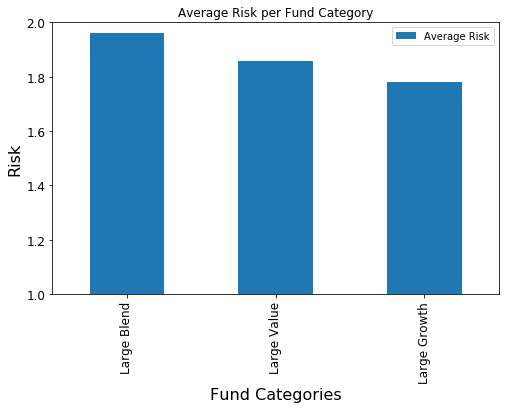

In [48]:
ax = risk_graph[['Average Risk']].plot(kind='bar', title ="Average Risk per Fund Category", figsize=(8,5), legend=True, fontsize=12)
ax.set_xlabel("Fund Categories", fontsize=16)
ax.set_ylabel("Risk", fontsize=16)
ax.set_ylim([1,2])
plt.show()

# Find the % of each fund category with all funds


In [49]:
perc_cat_fund = category_df.drop(columns=['Risk','Name']).sort_values("Category")
perc_cat_fund.head()

,Category
Ticker,
MXXVX,Large Blend
MFVSX,Large Blend
SPHQ,Large Blend
GTLOX,Large Blend
FMIHX,Large Blend


In [50]:
perc_fund = perc_cat_fund['Category'].value_counts()

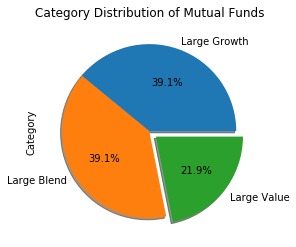

In [54]:
plot = perc_fund.plot.pie(y='Category', title="Category Distribution of Mutual Funds", legend=False, 
                   autopct='%1.1f%%', explode=(0, 0, 0.1), 
                   shadow=True, startangle=0)

# Find ESG relationship with Large Growth

In [58]:
esg_growth = combined.drop(columns=['Returns', 'Dividend Yield TTM', 'Turnover Ratio','P/E Forward','P/B','ROA','ROE','Projected EPS Growth (%)','Yield (%)','Market Cap($ mil)','Morningstar Rating'])
esg_growth.head()

,Name,Morningstar Risk,Fund Category,E,S,G,Average (Current)
Ticker,,,,,,,
MXXVX,Matthew 25,High,Large Blend,2.01,10.75,8.59,23.61
VLCGX,VALIC Company I Large Capital Growth,Below Average,Large Growth,3.37,10.88,7.98,22.23
MIGFX,MFS Massachusetts Inv Gr Stk A,Below Average,Large Growth,3.46,10.85,7.99,22.30
UMLGX,Columbia Select Large Cap Growth Inst,High,Large Growth,2.06,11.32,7.65,22.01
MGK,Vanguard Mega Cap Growth ETF,Average,Large Growth,2.71,11.41,8.23,22.58


In [59]:
esg_growth.rename(columns={'Fund Category':'Category', 'Morningstar Risk', 'Average (Current)': 'Total(ESG)'}, inplace=True)

In [62]:
large_growth_esg = esg_growth[esg_growth.Category == 'Large Growth']

large_growth_esg

,Name,Risk,Category,E,S,G,Total(ESG)
Ticker,,,,,,,
VLCGX,VALIC Company I Large Capital Growth,Below Average,Large Growth,3.37,10.88,7.98,22.23
MIGFX,MFS Massachusetts Inv Gr Stk A,Below Average,Large Growth,3.46,10.85,7.99,22.30
UMLGX,Columbia Select Large Cap Growth Inst,High,Large Growth,2.06,11.32,7.65,22.01
MGK,Vanguard Mega Cap Growth ETF,Average,Large Growth,2.71,11.41,8.23,22.58
VIGRX,Vanguard Growth Index Investor,Average,Large Growth,3.01,11.36,8.11,22.76
CSIEX,Calvert Equity A,Low,Large Growth,3.31,10.13,7.46,20.90
WLGAX,Ivy Large Cap Growth A,Average,Large Growth,2.51,11.68,7.82,22.01
POGAX,Putnam Growth Opportunities A,Average,Large Growth,2.41,11.51,7.99,22.30
BIAFX,Brown Advisory Flexible Equity Inv,Average,Large Growth,2.94,10.44,8.23,22.25


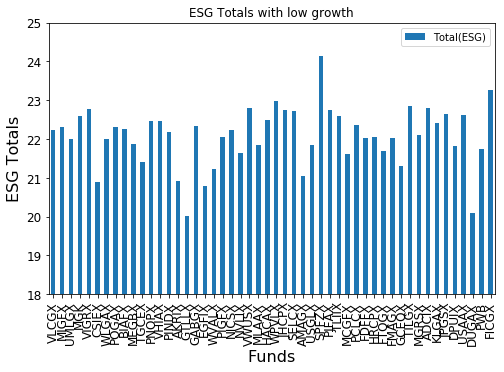

In [83]:
plot_esg = large_growth_esg[['Total(ESG)']].plot(kind='bar', title ="ESG Totals with low growth", figsize=(8,5), legend=True, fontsize=12)
plot_esg.set_xlabel("Funds", fontsize=16)
plot_esg.set_ylabel("ESG Totals", fontsize=16)
plot_esg.set_ylim([18,25])
plt.show()

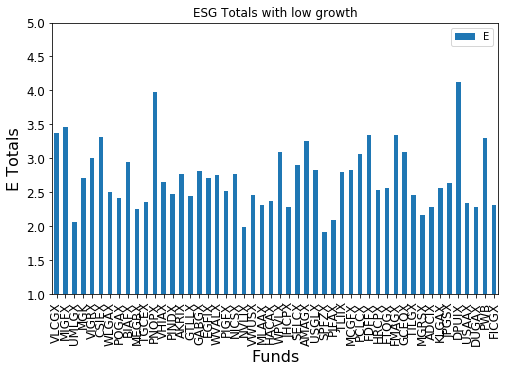

In [80]:
plot_e = large_growth_esg[['E']].plot(kind='bar', title ="ESG Totals with low growth", figsize=(8,5), legend=True, fontsize=12)
plot_e.set_xlabel("Funds", fontsize=16)
plot_e.set_ylabel("E Totals", fontsize=16)
plot_e.set_ylim([1,5])
plt.show()

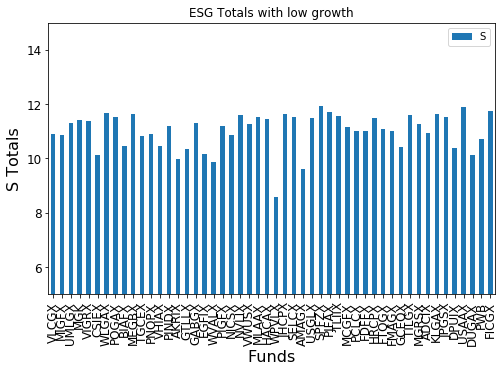

In [76]:
plot_s = large_growth_esg[['S']].plot(kind='bar', title ="ESG Totals with low growth", figsize=(8,5), legend=True, fontsize=12)
plot_s.set_xlabel("Funds", fontsize=16)
plot_s.set_ylabel("S Totals", fontsize=16)
plot_s.set_ylim([5,15])
plt.show()

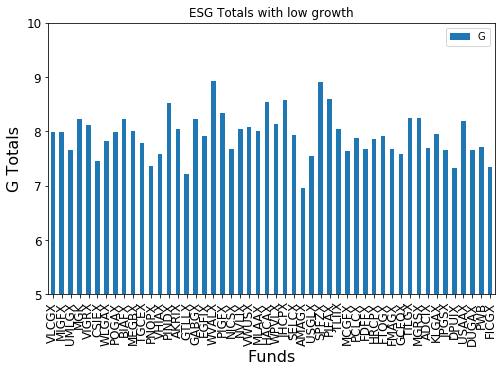

In [79]:
plot_g = large_growth_esg[['G']].plot(kind='bar', title ="ESG Totals with low growth", figsize=(8,5), legend=True, fontsize=12)
plot_g.set_xlabel("Funds", fontsize=16)
plot_g.set_ylabel("G Totals", fontsize=16)
plot_g.set_ylim([5,10])
plt.show()